In [1]:
#Andy Yang
#Aresty Research 
#Importing all the Libraries

import h5py
import pandas as pd
import numpy as np
import os
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from pathlib import Path
from datetime import datetime
from collections import namedtuple
import natsort
from natsort import index_natsorted, order_by_index
import tables
import jupyterthemes

In [2]:
!jt -t oceans16

# jt -r
#jt -r resets the theme of Jupyter Notebook

In [3]:
path = "/Address/Aresty Research Project/DATASETchallenge"
dir_list = os.listdir(path)            
print("Files and directories in '",path,"':")
print(dir_list) #List of all the .hdf5 files within a directory. 

Files and directories in ' /Users/andyy/Aresty Research Project/DATASETchallenge ':
['labels.txt', 'layer1.hdf5', 'layer10.hdf5', 'layer100.hdf5', 'layer101.hdf5', 'layer102.hdf5', 'layer103.hdf5', 'layer104.hdf5', 'layer105.hdf5', 'layer106.hdf5', 'layer107.hdf5', 'layer108.hdf5', 'layer109.hdf5', 'layer11.hdf5', 'layer110.hdf5', 'layer111.hdf5', 'layer112.hdf5', 'layer113.hdf5', 'layer114.hdf5', 'layer115.hdf5', 'layer116.hdf5', 'layer117.hdf5', 'layer118.hdf5', 'layer119.hdf5', 'layer12.hdf5', 'layer120.hdf5', 'layer121.hdf5', 'layer122.hdf5', 'layer123.hdf5', 'layer124.hdf5', 'layer125.hdf5', 'layer126.hdf5', 'layer127.hdf5', 'layer128.hdf5', 'layer129.hdf5', 'layer13.hdf5', 'layer130.hdf5', 'layer131.hdf5', 'layer132.hdf5', 'layer133.hdf5', 'layer134.hdf5', 'layer135.hdf5', 'layer136.hdf5', 'layer137.hdf5', 'layer138.hdf5', 'layer139.hdf5', 'layer14.hdf5', 'layer140.hdf5', 'layer141.hdf5', 'layer142.hdf5', 'layer143.hdf5', 'layer144.hdf5', 'layer145.hdf5', 'layer146.hdf5', 'layer1

In [4]:
File = namedtuple('File','name path size modified_date')

In [5]:
files = []

p = Path('/Address/Aresty Research Project/DATASETchallenge')

for item in p.glob('**/*'):
    if item.suffix in (['.hdf5']):
        name = item.name
        path = Path.resolve(item).parent
        size = item.stat().st_size
        modified = datetime.fromtimestamp(item.stat().st_mtime)
        files.append(File(name, path, size, modified))

In [6]:
df = pd.DataFrame(files)

In [7]:
df = df.reindex(index=order_by_index(df.index, index_natsorted(df['name'], reverse=False)))

In [8]:
df_info = df.set_index('name')
df_info

,path,size,modified_date
name,,,
layer1.hdf5,C:\Users\andyy\Aresty Research Project\DATASET...,1372372,2021-09-15 22:25:32
layer2.hdf5,C:\Users\andyy\Aresty Research Project\DATASET...,1364540,2021-09-15 22:25:36
layer3.hdf5,C:\Users\andyy\Aresty Research Project\DATASET...,1368500,2021-09-15 22:25:40
layer4.hdf5,C:\Users\andyy\Aresty Research Project\DATASET...,1353584,2021-09-15 22:25:42
layer5.hdf5,C:\Users\andyy\Aresty Research Project\DATASET...,1371008,2021-09-15 22:25:42
...,...,...,...
layer375.hdf5,C:\Users\andyy\Aresty Research Project\DATASET...,1373076,2021-09-15 22:25:42
layer376.hdf5,C:\Users\andyy\Aresty Research Project\DATASET...,1357060,2021-09-15 22:25:42
layer377.hdf5,C:\Users\andyy\Aresty Research Project\DATASET...,1371624,2021-09-15 22:25:42


In [9]:
d_x = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        x_mean = df[0].mean()
        
        d_x.append([layer,x_mean])
            
        #print(x_mean)
        
df1 = pd.DataFrame(data=d_x, columns=['file_name','mean value of x'])

df1.to_csv('out_x.csv',index=False) #Produces a .csv file with file location and the mean values of x for each layer in the directory. 

In [10]:
df_x = pd.DataFrame(data = d_x, columns = ['file_location','mean value of x']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_x['file_location']
df_x

,mean value of x
0,-23.114784
1,-23.101221
2,-23.112848
3,-23.100641
4,-23.125904
...,...
374,-23.098812
375,-23.113535
376,-23.100891
377,-23.112759


In [11]:
df_x.mean() #The mean value of the mean values of each layer. 

mean value of x   -23.111506
dtype: float64

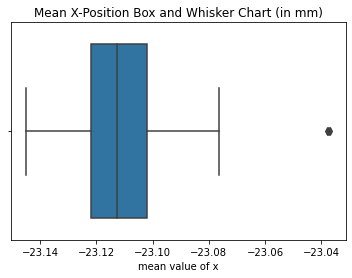

In [12]:
sns.boxplot(x=df_x['mean value of x']);
plt.title("Mean X-Position Box and Whisker Chart (in mm)")
plt.rcParams["figure.figsize"] = (16,8)
plt.show()

In [13]:
d_y = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        y_mean = df[1].mean()
        
        d_y.append([layer,y_mean])
            
        #print(x_mean)
        
df2 = pd.DataFrame(data=d_y, columns=['file_name','mean value of x'])

df2.to_csv('out_y.csv',index=False) #Produces a .csv file with file location and the mean values of x for each layer in the directory. 

In [14]:
df_y = pd.DataFrame(data = d_y, columns = ['file_location','mean value of y']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_y['file_location']
df_y

,mean value of y
0,-84.830269
1,-84.829369
2,-84.828369
3,-84.843018
4,-84.842278
...,...
374,-84.815605
375,-84.828545
376,-84.841385
377,-84.883942


In [15]:
df_y.mean() #The mean value of the mean values of each layer. 

mean value of y   -84.828672
dtype: float64

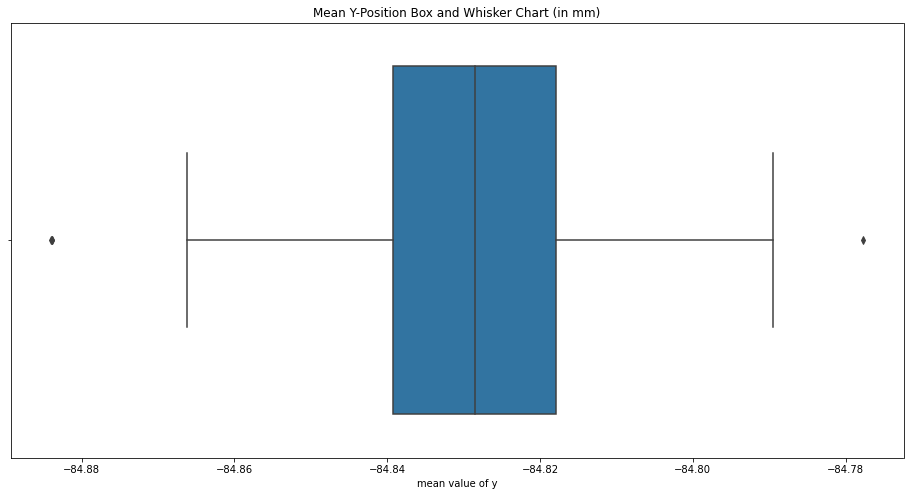

In [16]:
sns.boxplot(x=df_y['mean value of y']);
plt.title("Mean Y-Position Box and Whisker Chart (in mm)")
plt.rcParams["figure.figsize"] = (16,8)
plt.show()

In [17]:
d_a = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        a_mean = df[5].mean()
        
        d_a.append([layer,a_mean])
            
        #print(x_mean)
        
df3 = pd.DataFrame(data=d_a, columns=['file_name','mean value of Nominal Power'])

df3.to_csv('out_nominal_power.csv',index=False) #Produces a .csv file with file location and the mean values of x for each layer in the directory. 

In [18]:
df_a = pd.DataFrame(data = d_a, columns = ['file_location','mean value of Laser Power Current']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_a['file_location']
df_a

,mean value of Laser Power Current
0,4488.293945
1,4488.886230
2,4489.492188
3,4491.976074
4,4492.891602
...,...
374,4491.950684
375,4489.677734
376,4489.969238
377,4501.448242


In [19]:
df_a.mean() #The mean value of the mean values of each layer. 

mean value of Laser Power Current    4486.194156
dtype: float64

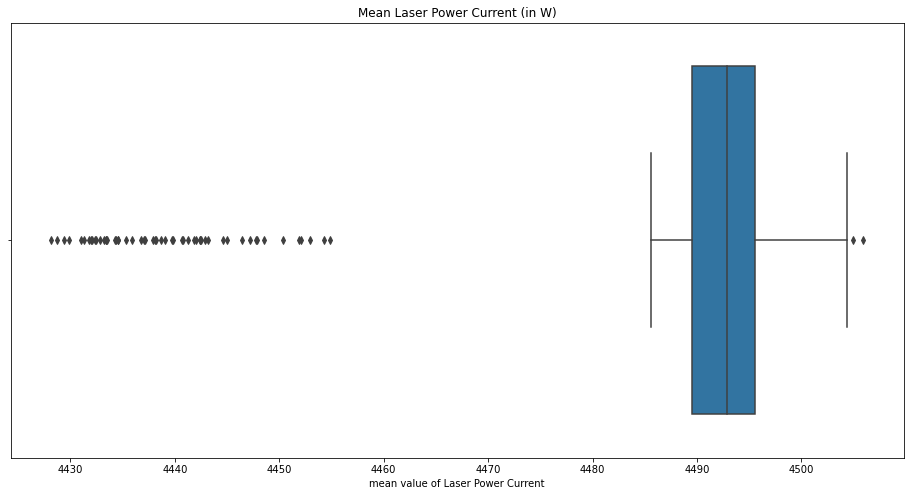

In [20]:
sns.boxplot(x=df_a['mean value of Laser Power Current']);
plt.title("Mean Laser Power Current (in W)")
plt.rcParams["figure.figsize"] = (16,8)
plt.show()

In [21]:
d_b = []

for layer in p.glob('**/*'):
    
    if layer.suffix in (['.hdf5']):
        
        #print(layer)
        
        df = pd.DataFrame(np.array(h5py.File(layer, 'r')['OpenData']).transpose())
        
        b_mean = df[6].mean()
        
        d_b.append([layer,b_mean])
            
        #print(x_mean)
        
df4 = pd.DataFrame(data=d_b, columns=['file_name','mean value of Signal_in_a_GaAs'])

df4.to_csv('signal_in_GaAs.csv',index=False) #Produces a .csv file with file location and the mean values of x for each layer in the directory. 

In [22]:
df_b = pd.DataFrame(data = d_b, columns = ['file_location','mean value of Signal_in_a_GaAs']) #Puts the means of the x_values into a Pandas DataFrame format. 
del df_b['file_location']
df_b

,mean value of Signal_in_a_GaAs
0,1543.055908
1,1518.683350
2,1547.233643
3,1508.754517
4,1497.558228
...,...
374,1538.949707
375,1553.340698
376,1533.481934
377,1492.057373


In [23]:
df_b.mean() #The mean value of the mean values of each layer. 

mean value of Signal_in_a_GaAs    1514.834531
dtype: float64

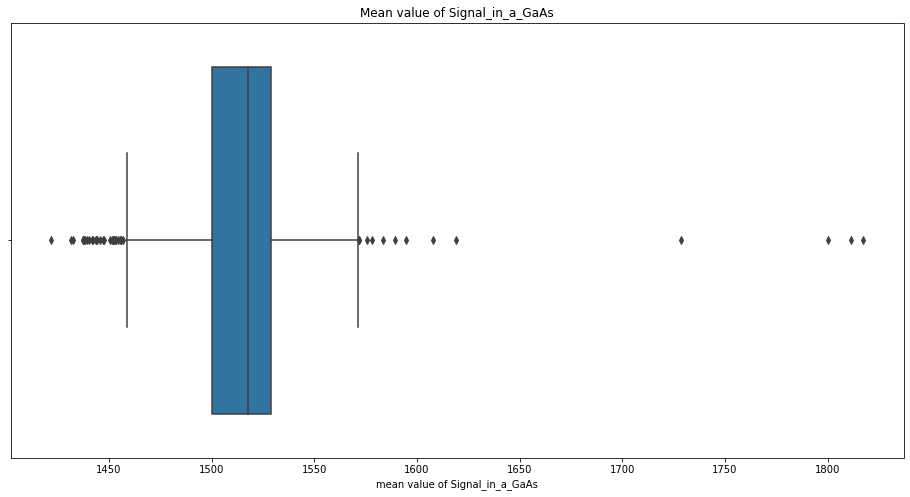

In [24]:
sns.boxplot(x=df_b["mean value of Signal_in_a_GaAs"]);
#sns.set_theme(style="whitegrid")
plt.title("Mean value of Signal_in_a_GaAs")
plt.rcParams["figure.figsize"] = (16,8)
plt.show()

## So far, the dataframes that change are labelled as such:
## df_x = Mean values of x
## df_y = Mean values of y
## df_a = Mean values of Laser Power Current
## df_b = Mean Values of SignalinaGaAS

In [25]:
df_combined = pd.concat([df_x, df_y, df_a, df_b], axis=1, join='inner')
df_combined

,mean value of x,mean value of y,mean value of Laser Power Current,mean value of Signal_in_a_GaAs
0,-23.114784,-84.830269,4488.293945,1543.055908
1,-23.101221,-84.829369,4488.886230,1518.683350
2,-23.112848,-84.828369,4489.492188,1547.233643
3,-23.100641,-84.843018,4491.976074,1508.754517
4,-23.125904,-84.842278,4492.891602,1497.558228
...,...,...,...,...
374,-23.098812,-84.815605,4491.950684,1538.949707
375,-23.113535,-84.828545,4489.677734,1553.340698
376,-23.100891,-84.841385,4489.969238,1533.481934
377,-23.112759,-84.883942,4501.448242,1492.057373


In [26]:
corr = df_combined.corr()

<AxesSubplot:>

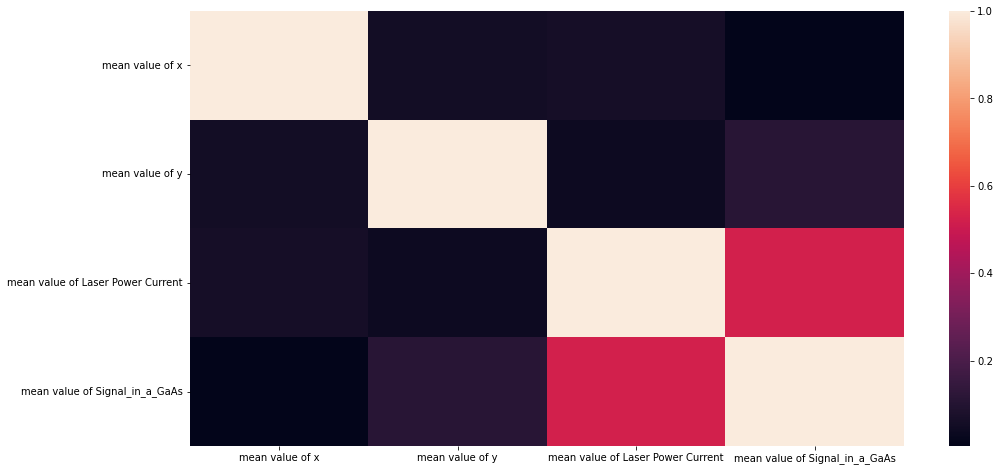

In [27]:
sns.heatmap(corr)

## So it looks like there is actually relatively low correlation between the variables that are changing, but, there seem to be two exceptions: the correlations between the mean value of the Laser Power Current as well as the mean value of the Signal in a GaAs. 

NameError: name 'ax' is not defined

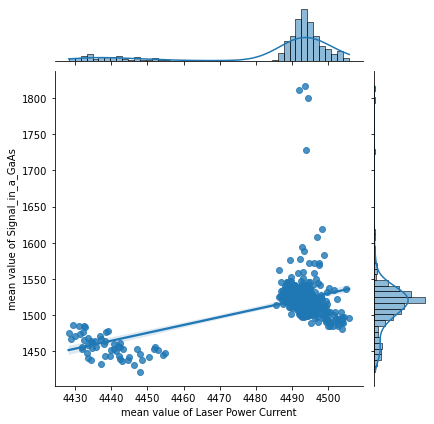

In [31]:
sns.jointplot(x='mean value of Laser Power Current',y='mean value of Signal_in_a_GaAs',kind = "reg",data=df_combined)
ax.plot(['First line', 'Second line'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)


In [ ]:
#Result: Two boxplots comparing the anomaly and non-anomaly layers. The results for both layers should be the 
#four columns of data that are changing. Separate good and bad layers to see if there's any difference in 
#between those two. 